In [17]:
from create_percent_diff_summary import collect_r2_scores, plot_r2_heatmap_with_symbols, replace_features_with_symbols
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
r2_scores, feature_labels = collect_r2_scores()


Processing folder: -2074223237608632438


2024-11-25 05:35:19.908214: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Processing folder: 3018420796423631326
Processing folder: 385785126364412875
Processing folder: -5378767990556019025
Processing folder: -8721302243423950900
Processing folder: -1555579470930404703
Processing folder: 873396586410074794
Processing folder: -4385726170902574240
Processing folder: -6732384669984308125
Processing folder: -5688998736288883500
Processing folder: 9100019189307562067
Processing folder: -8578990204916954013
Processing folder: 7859769112433691692
Processing folder: -5339593163521714121
Processing folder: -3586271143228161277
Processing folder: -2691622148981425901
Processing folder: -5378767990556019025
Processing folder: -2143628280432124037
Processing folder: -5675580404039521027
Processing folder: 1680180829675865592
Processing folder: 3123685554898137390
Processing folder: -8335083044558368468
Processing folder: 4478560288447804787
Processing folder: 4143972947282222655
Processing folder: -9108707032320630395
Processing folder: -3664852785364047222
Processing 

In [7]:
# Dataset labels
DATASET_NAMES = [
    "[dotson, thwaites]",
    "[pig, thwaites]",
    "[dotson, pig]",
    "[dotson]",
    "[pig]",
    "[thwaites]",
]

In [18]:
# Visualize R2 scores using a heatmap with symbols and fixed cbar range
def plot_r2_heatmap_with_symbols_new(r2_scores, feature_labels):
    feature_symbols = replace_features_with_symbols(feature_labels)
    r2_df = pd.DataFrame(np.array(r2_scores).T, columns=DATASET_NAMES, index=feature_symbols)

    plt.figure(figsize=(14, 8))
    sns.heatmap(
        r2_df,
        annot=True,
        fmt=".3f",
        cmap="YlGn",
        cbar=True,
        vmin=0,  # Minimum value of the color bar
        vmax=1,  # Maximum value of the color bar
    )
    plt.title("Validation $R^2$ Scores for Feature Subsets and Datasets")
    plt.xlabel("Feature Subsets")
    plt.ylabel("Training Dataset Combinations")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

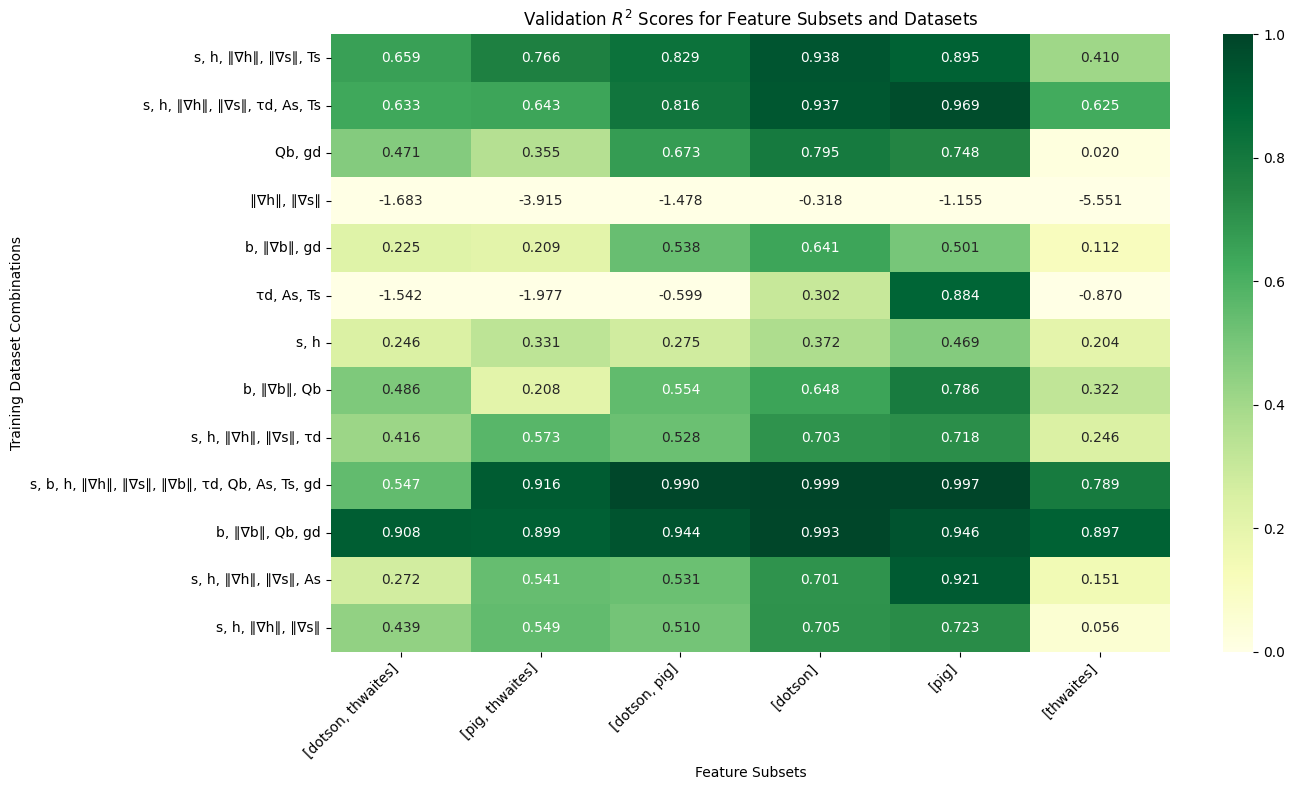

In [19]:
plot_r2_heatmap_with_symbols_new(r2_scores, feature_labels)

In [20]:
save_array = np.array(r2_scores).T

In [21]:
np.save('save_array.npy', save_array)